**Import the necessary libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

**Load data into pandas dataframe**


In [2]:
user_data = pd.read_csv(r'D:\MACHINE LEARNING\Mentorship program\ML Project1\features_data.csv')
equity_data = pd.read_csv(r'D:\MACHINE LEARNING\Mentorship program\ML Project1\equity_value_data.csv')

In [3]:
user_data.head()

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91


In [4]:
equity_data.head()

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


In [5]:
equity_data_first = equity_data.groupby("user_id").first()

In [6]:
equity_data_first=equity_data_first.reset_index('user_id')

In [7]:
equity_data_first

,user_id,timestamp,close_equity
0,0012db34aa7b083f5714e7831195e54d,2016-08-18T00:00:00Z,1211.6055
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18T00:00:00Z,2756.3100
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16T00:00:00Z,100.0000
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23T00:00:00Z,505.9700
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18T00:00:00Z,131.5515
...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2016-08-18T00:00:00Z,226.8878
5580,ffa12d2f97e310910291f9b26fb2318d,2016-08-17T00:00:00Z,2750.9388
5581,ffae713096867a32e74f633060667153,2016-09-28T00:00:00Z,19.7401
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-02-15T00:00:00Z,42.7200


**To check if any of the users started before 2016-08-16**

In [8]:
import datetime
date1=datetime.date(2016,8,16)
equity_data_first['timestamp']=pd.to_datetime(equity_data_first['timestamp']).dt.date
# equity_data_first[equity_data_first['timestamp'].iloc[:]>=date1]
equity_data_first['tstmp']=equity_data_first['timestamp']-date1
equity_data_first['days_diff']=equity_data_first['tstmp'].dt.days
equity_data_first

,user_id,timestamp,close_equity,tstmp,days_diff
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,1211.6055,2 days,2
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18,2756.3100,2 days,2
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16,100.0000,184 days,184
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23,505.9700,191 days,191
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18,131.5515,2 days,2
...,...,...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2016-08-18,226.8878,2 days,2
5580,ffa12d2f97e310910291f9b26fb2318d,2016-08-17,2750.9388,1 days,1
5581,ffae713096867a32e74f633060667153,2016-09-28,19.7401,43 days,43
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-02-15,42.7200,183 days,183


In [9]:
equity_data_last = equity_data.groupby("user_id").last()
equity_data_last=equity_data_last.reset_index('user_id')
equity_data_last

,user_id,timestamp,close_equity
0,0012db34aa7b083f5714e7831195e54d,2017-08-17T00:00:00Z,487.7885
1,001d6c77dbdb3213cead7673f250bfdc,2017-08-17T00:00:00Z,3981.3350
2,002e4653171ddc61c3cd30603cd7bd3e,2017-08-18T00:00:00Z,134.3800
3,00384fa9be6fdca1b786bae70d78f88f,2017-08-18T00:00:00Z,426.2400
4,0042aac295a0d4df88f4b83012778bd4,2017-08-17T00:00:00Z,1769.2150
...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2017-08-17T00:00:00Z,62.1951
5580,ffa12d2f97e310910291f9b26fb2318d,2017-08-16T00:00:00Z,7448.1895
5581,ffae713096867a32e74f633060667153,2017-08-17T00:00:00Z,32.9300
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-08-18T00:00:00Z,25.5900


**To check if the user is churned based on the difference between the last collection date(2017-08-18) and the last entry date of the user**

In [10]:
import datetime
date2=datetime.date(2017,8,18)
equity_data_last['timestamp']=pd.to_datetime(equity_data_last['timestamp']).dt.date
equity_data_last['tstmp']=date2-equity_data_last['timestamp']
equity_data_last['days_diff']=equity_data_last['tstmp'].dt.days
equity_data_last[equity_data_last['days_diff']>=28]

,user_id,timestamp,close_equity,tstmp,days_diff
6,004aab1640f3a04b87b1f404fb4c018d,2017-04-28,25.1400,112 days,112
7,004ea9d7662aa8dc840bbff212cfa4b8,2017-07-10,100.9800,39 days,39
15,00f89f56f25989b0bb7ea05bac2dccc4,2017-05-19,1143.6600,91 days,91
34,01ef51aa8fab66b13d2249bc6ee68975,2017-05-11,27.9182,99 days,99
35,02012c83f5c4508404312aec848e2deb,2017-05-15,1773.7500,95 days,95
...,...,...,...,...,...
5538,fdbb2b7567e059cd920c8401906caa6d,2017-04-21,55.3200,119 days,119
5543,fe17d44323f4bbf332cc2432356116b8,2017-06-09,13.3100,70 days,70
5552,fe8eed9b8cdc7e429d311fffdfa7c9fe,2017-06-22,5536.9400,57 days,57
5562,ff05ebb811f35d2ad064e9026265c4bc,2017-01-19,17.8700,211 days,211


In [11]:
equity_data_last['churned_last']=np.where(equity_data_last['days_diff']>=28,'yes','no')
equity_data_last

,user_id,timestamp,close_equity,tstmp,days_diff,churned_last
0,0012db34aa7b083f5714e7831195e54d,2017-08-17,487.7885,1 days,1,no
1,001d6c77dbdb3213cead7673f250bfdc,2017-08-17,3981.3350,1 days,1,no
2,002e4653171ddc61c3cd30603cd7bd3e,2017-08-18,134.3800,0 days,0,no
3,00384fa9be6fdca1b786bae70d78f88f,2017-08-18,426.2400,0 days,0,no
4,0042aac295a0d4df88f4b83012778bd4,2017-08-17,1769.2150,1 days,1,no
...,...,...,...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2017-08-17,62.1951,1 days,1,no
5580,ffa12d2f97e310910291f9b26fb2318d,2017-08-16,7448.1895,2 days,2,no
5581,ffae713096867a32e74f633060667153,2017-08-17,32.9300,1 days,1,no
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-08-18,25.5900,0 days,0,no


In [12]:
eq_data=equity_data_last[equity_data_last['churned_last']=='yes']
eq_data_new=eq_data[['user_id','churned_last']]
eq_data_new1=eq_data_new
eq_data_new1

,user_id,churned_last
6,004aab1640f3a04b87b1f404fb4c018d,yes
7,004ea9d7662aa8dc840bbff212cfa4b8,yes
15,00f89f56f25989b0bb7ea05bac2dccc4,yes
34,01ef51aa8fab66b13d2249bc6ee68975,yes
35,02012c83f5c4508404312aec848e2deb,yes
...,...,...
5538,fdbb2b7567e059cd920c8401906caa6d,yes
5543,fe17d44323f4bbf332cc2432356116b8,yes
5552,fe8eed9b8cdc7e429d311fffdfa7c9fe,yes
5562,ff05ebb811f35d2ad064e9026265c4bc,yes


**To calculate the difference between consecutive dates for each user separately in gap column**

In [13]:
equity_data_new =equity_data.sort_values(by=['user_id', 'timestamp']).reset_index(drop=True)
equity_data_new['timestamp']=pd.to_datetime(equity_data_new['timestamp']).dt.date
equity_data_new['gap'] = equity_data_new.groupby('user_id')['timestamp'].diff()

**To check for Null valules in the data in gap column**

In [14]:
equity_data_new[equity_data_new.isin([np.nan,pd.NaT]).any(1)]

,timestamp,close_equity,user_id,gap
0,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d,NaT
252,2016-08-18,2756.3100,001d6c77dbdb3213cead7673f250bfdc,NaT
504,2017-02-16,100.0000,002e4653171ddc61c3cd30603cd7bd3e,NaT
632,2017-02-23,505.9700,00384fa9be6fdca1b786bae70d78f88f,NaT
756,2016-08-18,131.5515,0042aac295a0d4df88f4b83012778bd4,NaT
...,...,...,...,...
1118095,2016-08-18,226.8878,ff9ee08791e20724a86995ab2bc72578,NaT
1118347,2016-08-17,2750.9388,ffa12d2f97e310910291f9b26fb2318d,NaT
1118599,2016-09-28,19.7401,ffae713096867a32e74f633060667153,NaT
1118823,2017-02-15,42.7200,ffbda9a14e07718e2b21fb03896d21c5,NaT


**Replace the null values with timedelta (0 days)**

In [15]:
equity_data_new['gap'].fillna(pd.Timedelta('0 days'),inplace=True)

**timedelta of gap column into integer values**

In [16]:
equity_data_new['gap_int']=equity_data_new['gap'].dt.days
equity_data_new

,timestamp,close_equity,user_id,gap,gap_int
0,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d,0 days,0
1,2016-08-19,1173.5640,0012db34aa7b083f5714e7831195e54d,1 days,1
2,2016-08-22,1253.0597,0012db34aa7b083f5714e7831195e54d,3 days,3
3,2016-08-23,1252.9050,0012db34aa7b083f5714e7831195e54d,1 days,1
4,2016-08-24,1262.1360,0012db34aa7b083f5714e7831195e54d,1 days,1
...,...,...,...,...,...
1119153,2017-08-14,2156.2400,ffc1e622f3a0b2666f09a6dcb7f27918,3 days,3
1119154,2017-08-15,2134.7100,ffc1e622f3a0b2666f09a6dcb7f27918,1 days,1
1119155,2017-08-16,2152.1200,ffc1e622f3a0b2666f09a6dcb7f27918,1 days,1
1119156,2017-08-17,2042.2800,ffc1e622f3a0b2666f09a6dcb7f27918,1 days,1


In [17]:
# equity_data_new[(equity_data_new['user_id']=='0423b88554cedaa7efd8dd4c81774cce')& (equity_data_new['gap_int']>=28)] 

**Sort the dataframe (user_data) by user_id**

In [18]:
new_user_data =user_data.sort_values(by=['user_id']).reset_index(drop=True)
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4
...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5


**Number of times a user churned**

In [19]:
user_list_new=equity_data_new[equity_data_new['gap_int']>=28]['user_id']
churned_by_new=['yes']*324
data_new = list(zip(user_list_new,churned_by_new))
churned_new = pd.DataFrame(data_new, columns = ['user_id','churned_last'])
churned_new_df=pd.concat([churned_new,eq_data_new],axis=0)
churned_new_df=churned_new_df.sort_values(by=['user_id']).reset_index(drop=True)
no_of_times_userchurned=churned_new_df.groupby('user_id').count()
no_of_times_userchurned.rename(columns={"churned_last": "no_of_times_userchurn"}, inplace=True)
no_of_times_userchurned=no_of_times_userchurned.reset_index()
no_of_times_userchurned

,user_id,no_of_times_userchurn
0,00440034cc4152bfb01b30f5c381c4e3,1
1,004aab1640f3a04b87b1f404fb4c018d,1
2,004ea9d7662aa8dc840bbff212cfa4b8,1
3,005d630a68b4ab3a2f4cd49d9a87c50d,1
4,00f89f56f25989b0bb7ea05bac2dccc4,1
...,...,...
1002,ff0ae95285c43e3a5af84860bffaa544,1
1003,ff377467d4e28b425266a8b2c8b2f5c7,1
1004,ff6d64d75fa2ffd703dabf66b7b86b99,1
1005,ff7610fdd7ac5cbfa0b17aca53af5db4,1


**List of users, those are churned based on the difference between consecutive dates**

In [20]:
user_list=equity_data_new[equity_data_new['gap_int']>=28]['user_id'].drop_duplicates()
user_list=list(user_list)
churned_by_consdiff=['yes']*279
data = list(zip(user_list,churned_by_consdiff))
churned_df1 = pd.DataFrame(data, columns = ['user_id','churn/not_churn'])

user_list1=list(set(new_user_data['user_id']).symmetric_difference(set(churned_df1['user_id'])))
churned_by_consdiff1=['no']*5305
data1= list(zip(user_list1,churned_by_consdiff1))
churned_df2 = pd.DataFrame(data1, columns = ['user_id','churn/not_churn'])

churned_df=pd.concat([churned_df1,churned_df2])
churned_df=churned_df.sort_values(by=['user_id']).reset_index(drop=True)
churned_df

,user_id,churn/not_churn
0,0012db34aa7b083f5714e7831195e54d,no
1,001d6c77dbdb3213cead7673f250bfdc,no
2,002e4653171ddc61c3cd30603cd7bd3e,no
3,00384fa9be6fdca1b786bae70d78f88f,no
4,0042aac295a0d4df88f4b83012778bd4,no
...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,no
5580,ffa12d2f97e310910291f9b26fb2318d,no
5581,ffae713096867a32e74f633060667153,no
5582,ffbda9a14e07718e2b21fb03896d21c5,no


**Create a dataframe based on consecutive difference between dates**

In [21]:
new_user_data['churn_by_consec_diff'] = churned_df['churn/not_churn']
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn_by_consec_diff
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no
...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no


**Add churn_by_lastdate into dataframe(new_user_data)**

In [22]:
new_user_data['churn_by_lastdate'] = equity_data_last['churned_last']
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn_by_consec_diff,churn_by_lastdate
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no,no
...,...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no,no


**Add a new column, avg time between churns for each user in the steps below**

In [23]:
#For consecutive days
df_avg1=equity_data_new[equity_data_new['gap_int']>=28]
df_sum_avg1=df_avg1.groupby('user_id')['gap_int'].sum()

#Series to dataframe
df_avg2=df_sum_avg1.to_frame('days_diff')
df_avg3=df_avg2.reset_index()
df_avg3

,user_id,days_diff
0,00440034cc4152bfb01b30f5c381c4e3,80
1,005d630a68b4ab3a2f4cd49d9a87c50d,123
2,028367ff3cbcc04c2afc2ce3336c00e2,69
3,0423b88554cedaa7efd8dd4c81774cce,197
4,062ea0ff3b7fc36ae471968aced1f4a1,139
...,...,...
274,fdc54af66d1190dec81b95b4a2965634,67
275,ff0ae95285c43e3a5af84860bffaa544,81
276,ff377467d4e28b425266a8b2c8b2f5c7,60
277,ff7610fdd7ac5cbfa0b17aca53af5db4,172


In [24]:
#As per last date(2017/08/18)
diff_lastdate=equity_data_last[equity_data_last['days_diff']>=28]
diff_lastdate1=diff_lastdate[['user_id','days_diff']]
diff_lastdate1

,user_id,days_diff
6,004aab1640f3a04b87b1f404fb4c018d,112
7,004ea9d7662aa8dc840bbff212cfa4b8,39
15,00f89f56f25989b0bb7ea05bac2dccc4,91
34,01ef51aa8fab66b13d2249bc6ee68975,99
35,02012c83f5c4508404312aec848e2deb,95
...,...,...
5538,fdbb2b7567e059cd920c8401906caa6d,119
5543,fe17d44323f4bbf332cc2432356116b8,70
5552,fe8eed9b8cdc7e429d311fffdfa7c9fe,57
5562,ff05ebb811f35d2ad064e9026265c4bc,211


In [25]:
#Sum of all the days between churns
diff_last_consec=pd.concat([diff_lastdate1,df_avg3],axis=0)
diff_total=diff_last_consec.groupby('user_id')['days_diff'].sum()
diff_total_df=diff_total.to_frame('days_diff')
diff_total_df=diff_total_df.reset_index()
diff_total_df

,user_id,days_diff
0,00440034cc4152bfb01b30f5c381c4e3,80
1,004aab1640f3a04b87b1f404fb4c018d,112
2,004ea9d7662aa8dc840bbff212cfa4b8,39
3,005d630a68b4ab3a2f4cd49d9a87c50d,123
4,00f89f56f25989b0bb7ea05bac2dccc4,91
...,...,...
1002,ff0ae95285c43e3a5af84860bffaa544,81
1003,ff377467d4e28b425266a8b2c8b2f5c7,60
1004,ff6d64d75fa2ffd703dabf66b7b86b99,165
1005,ff7610fdd7ac5cbfa0b17aca53af5db4,172


In [26]:
#To find how many times each user is churned(consecutive and last date)
churn_conse_lastdate=pd.concat([churned_new,eq_data_new1],axis=0)
chrn_new=churn_conse_lastdate.groupby('user_id').count()
chrn_new=chrn_new.sort_values(by=['user_id']).reset_index()
chrn_new['churned_last'].value_counts()
chrn_new

,user_id,churned_last
0,00440034cc4152bfb01b30f5c381c4e3,1
1,004aab1640f3a04b87b1f404fb4c018d,1
2,004ea9d7662aa8dc840bbff212cfa4b8,1
3,005d630a68b4ab3a2f4cd49d9a87c50d,1
4,00f89f56f25989b0bb7ea05bac2dccc4,1
...,...,...
1002,ff0ae95285c43e3a5af84860bffaa544,1
1003,ff377467d4e28b425266a8b2c8b2f5c7,1
1004,ff6d64d75fa2ffd703dabf66b7b86b99,1
1005,ff7610fdd7ac5cbfa0b17aca53af5db4,1


In [27]:
diff_total_df['no_of_churns']=chrn_new['churned_last']
diff_total_df

,user_id,days_diff,no_of_churns
0,00440034cc4152bfb01b30f5c381c4e3,80,1
1,004aab1640f3a04b87b1f404fb4c018d,112,1
2,004ea9d7662aa8dc840bbff212cfa4b8,39,1
3,005d630a68b4ab3a2f4cd49d9a87c50d,123,1
4,00f89f56f25989b0bb7ea05bac2dccc4,91,1
...,...,...,...
1002,ff0ae95285c43e3a5af84860bffaa544,81,1
1003,ff377467d4e28b425266a8b2c8b2f5c7,60,1
1004,ff6d64d75fa2ffd703dabf66b7b86b99,165,1
1005,ff7610fdd7ac5cbfa0b17aca53af5db4,172,1


In [28]:
#users with number of churn greater than 1 are considered 
df_multichurn=diff_total_df[diff_total_df['no_of_churns']>1]
df_multichurn

,user_id,days_diff,no_of_churns
8,028367ff3cbcc04c2afc2ce3336c00e2,231,3
15,0423b88554cedaa7efd8dd4c81774cce,197,2
24,062ea0ff3b7fc36ae471968aced1f4a1,279,2
26,06b894b1cc7bb832284efa097c122e2a,165,2
38,09bc5486de3a64be6dcf3a8c76bbe06a,189,2
...,...,...,...
970,f53d4b3dbb2fdcfd93e1b8acacd60aa4,211,2
982,f97628bf1b525e526a094654ba001cde,156,2
988,fb35f2d4f7bd6c9e4085856fe14e8d89,160,2
993,fbec3cca892e02e38d31aea039989a61,188,2


In [29]:
df_multichurn['avg_churn_days']=df_multichurn['days_diff']/df_multichurn['no_of_churns']
df_multichurn=df_multichurn.drop(columns=['days_diff','no_of_churns'])
df_multichurn

C:\Users\Priyambada\AppData\Local\Temp\ipykernel_16892\1625311882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multichurn['avg_churn_days']=df_multichurn['days_diff']/df_multichurn['no_of_churns']


,user_id,avg_churn_days
8,028367ff3cbcc04c2afc2ce3336c00e2,77.0
15,0423b88554cedaa7efd8dd4c81774cce,98.5
24,062ea0ff3b7fc36ae471968aced1f4a1,139.5
26,06b894b1cc7bb832284efa097c122e2a,82.5
38,09bc5486de3a64be6dcf3a8c76bbe06a,94.5
...,...,...
970,f53d4b3dbb2fdcfd93e1b8acacd60aa4,105.5
982,f97628bf1b525e526a094654ba001cde,78.0
988,fb35f2d4f7bd6c9e4085856fe14e8d89,80.0
993,fbec3cca892e02e38d31aea039989a61,94.0


In [30]:
user_avgtime_list=list(set(new_user_data['user_id']).symmetric_difference(set(df_multichurn['user_id'])))
notchurn_avg=[0]*5465
data_avg_time= list(zip(user_avgtime_list,notchurn_avg))
churn_dfavg = pd.DataFrame(data_avg_time, columns = ['user_id','avg_churn_days'])

final_avg_time=pd.concat([df_multichurn,churn_dfavg])
final_avg_time=final_avg_time.sort_values(by=['user_id']).reset_index(drop=True)
final_avg_time

,user_id,avg_churn_days
0,0012db34aa7b083f5714e7831195e54d,0.0
1,001d6c77dbdb3213cead7673f250bfdc,0.0
2,002e4653171ddc61c3cd30603cd7bd3e,0.0
3,00384fa9be6fdca1b786bae70d78f88f,0.0
4,0042aac295a0d4df88f4b83012778bd4,0.0
...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,0.0
5580,ffa12d2f97e310910291f9b26fb2318d,0.0
5581,ffae713096867a32e74f633060667153,0.0
5582,ffbda9a14e07718e2b21fb03896d21c5,0.0


**Create a column is_churned based on both lastdates and consecutive dates**

In [31]:
new_user_data['is_churned']=np.where((new_user_data['churn_by_lastdate'] == 'yes') | (new_user_data['churn_by_consec_diff']== 'yes'),'yes', 'no')

In [32]:
new_user_data.drop(columns=['churn_by_lastdate','churn_by_consec_diff'],inplace=True)

**Final dataframe**

In [33]:
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,is_churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no
...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no


**Adding a new column:number of times a userchurned**

In [34]:
# user_list_churn=list(set(new_user_data['user_id']).symmetric_difference(set(no_of_times_userchurned['user_id'])))
# not_churned=[0]*4577
# data_not_churn_time= list(zip(user_list_churn,not_churned))
# user_not_churned_times = pd.DataFrame(data_not_churn_time, columns = ['user_id','no_of_times_userchurn'])

# user_total_churn_times=pd.concat([no_of_times_userchurned,user_not_churned_times])
# user_total_churn_times=user_total_churn_times.sort_values(by=['user_id']).reset_index(drop=True)
# new_user_data['no_of_times_userchurn']=user_total_churn_times['no_of_times_userchurn']
# new_user_data

In [35]:
new_user_data['avgtime_bet_churns']=final_avg_time['avg_churn_days']
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,is_churned,avgtime_bet_churns
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no,0.0
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no,0.0
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no,0.0
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no,0.0
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no,0.0
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no,0.0
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no,0.0
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no,0.0


**What Percentage of the users have churned in the data provided?**

In [36]:
num_users = len(new_user_data)
num_churned = len(new_user_data[new_user_data['is_churned']=='yes'])

answer1 = 100 * (num_churned/num_users)
answer1

18.0336676217765

**Exploratory data analysis (EDA)**

In [37]:
new_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
 9   is_churned                    5584 non-null   object 
 10  avgtime_bet_churns            5584 non-null   float64
dtypes: float64(3), object(8)
memory usage: 480.0+ KB


In [38]:
new_user_data.isnull().any().sum()

0

In [39]:
new_user_data.duplicated().any().sum()

0

In [40]:
unique_values = new_user_data.nunique()
unique_values

risk_tolerance                     3
investment_experience              4
liquidity_needs                    3
platform                           3
time_spent                      4502
instrument_type_first_traded      11
first_deposit_amount             317
time_horizon                       3
user_id                         5584
is_churned                         2
avgtime_bet_churns                94
dtype: int64

In [41]:
new_user_data.describe(include='all')

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,is_churned,avgtime_bet_churns
count,5584,5584,5584,5584,5584.000000,5584,5584.000000,5584,5584,5584,5584.000000
unique,3,4,3,3,NaN,11,NaN,3,5584,2,NaN
top,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,NaN,stock,NaN,short_time_horizon,0012db34aa7b083f5714e7831195e54d,no,NaN
freq,3566,2578,4217,3550,NaN,4827,NaN,2833,1,4577,NaN
mean,NaN,NaN,NaN,NaN,34.509706,NaN,633.566805,NaN,NaN,NaN,1.821842
std,NaN,NaN,NaN,NaN,155.080551,NaN,2118.323263,NaN,NaN,NaN,13.162458
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,2.848908,NaN,50.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,13.474708,NaN,100.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,33.823829,NaN,500.000000,NaN,NaN,NaN,0.000000


In [42]:
new_user_data.drop(columns=['user_id'],axis=1,inplace=True)
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,is_churned,avgtime_bet_churns
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,no,0.0
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,no,0.0
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,no,0.0
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,no,0.0
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,no,0.0
...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,no,0.0
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,no,0.0
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,no,0.0
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,no,0.0


In [43]:
categorical_cols = ['risk_tolerance','investment_experience','liquidity_needs',
                    'platform','instrument_type_first_traded','time_horizon','is_churned']

In [44]:
numerical_cols = ['time_spent','first_deposit_amount','avgtime_bet_churns']

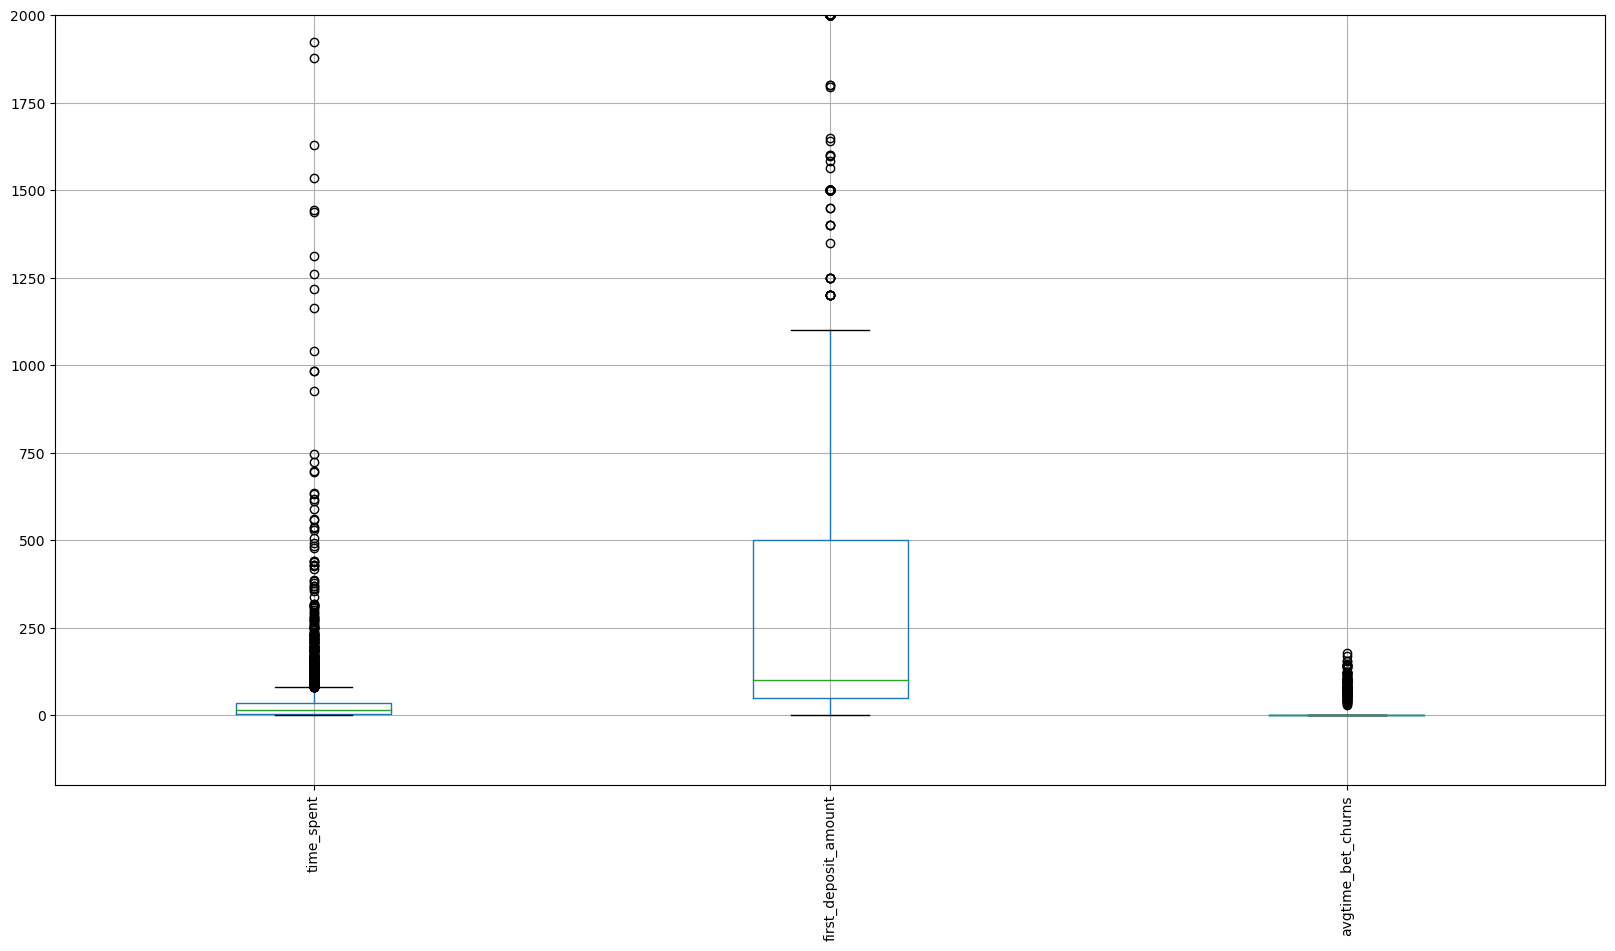

In [45]:
new_user_data[numerical_cols].boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.ylim(-200,2000)
plt.show()

In [46]:
new_user_data['is_churned'].value_counts(normalize=True)

no     0.819663
yes    0.180337
Name: is_churned, dtype: float64

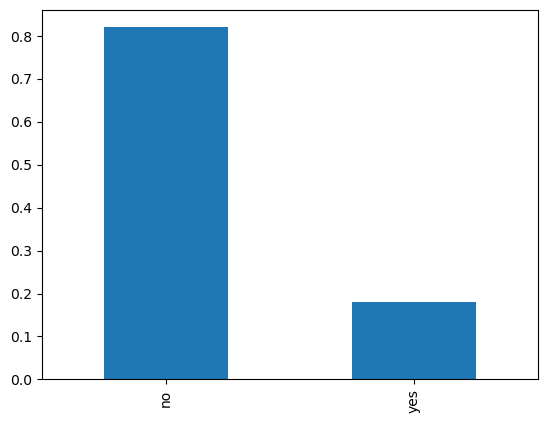

In [47]:
new_user_data['is_churned'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [48]:
new_df=pd.get_dummies(new_user_data,columns=categorical_cols,drop_first=True)
churn_data_raw = new_user_data.copy()
new_df

,time_spent,first_deposit_amount,avgtime_bet_churns,risk_tolerance_low_risk_tolerance,risk_tolerance_med_risk_tolerance,investment_experience_good_investment_exp,investment_experience_limited_investment_exp,investment_experience_no_investment_exp,liquidity_needs_somewhat_important_liq_need,liquidity_needs_very_important_liq_need,...,instrument_type_first_traded_lp,instrument_type_first_traded_mlp,instrument_type_first_traded_reit,instrument_type_first_traded_rlt,instrument_type_first_traded_stock,instrument_type_first_traded_tracking,instrument_type_first_traded_wrt,time_horizon_med_time_horizon,time_horizon_short_time_horizon,is_churned_yes
0,9.701933,100.0,0.0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,19.568433,1500.0,0.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,22.091867,100.0,0.0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,108.555350,500.0,0.0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,39.973717,100.0,0.0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,4.703033,100.0,0.0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5580,6.988433,250.0,0.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5581,8.898000,20.0,0.0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
5582,34.150567,2.0,0.0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


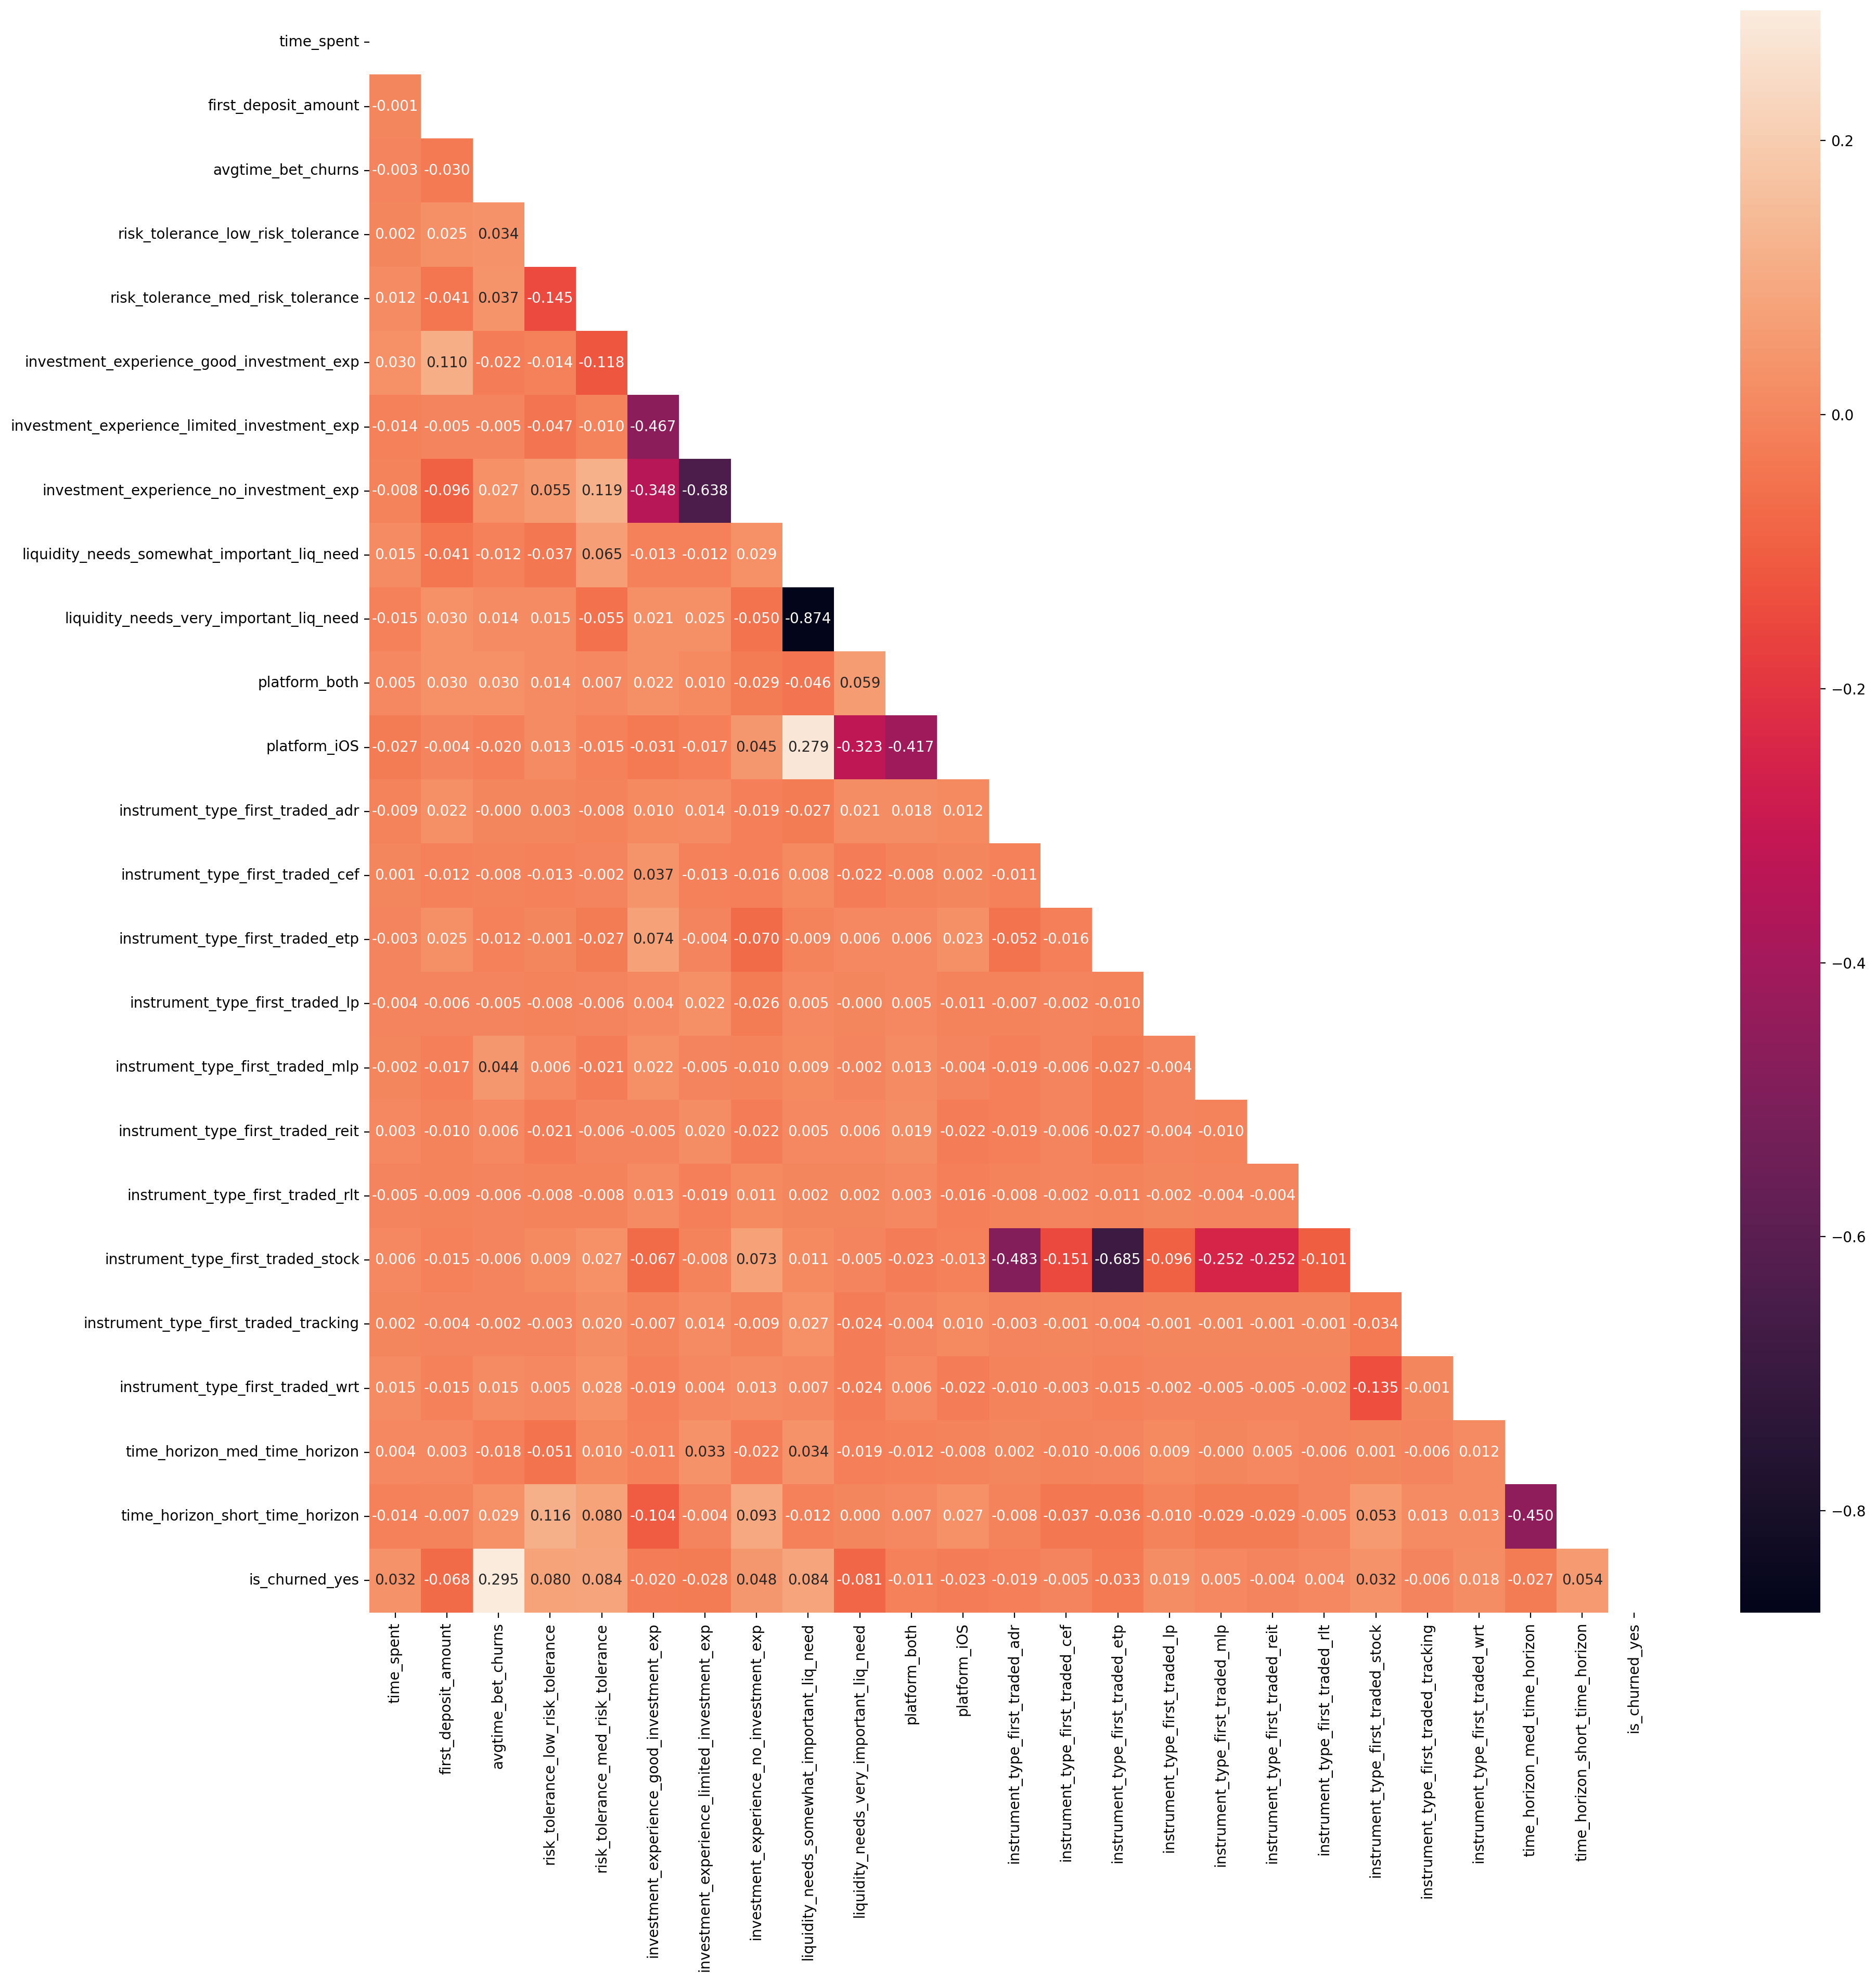

In [49]:
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(new_df.corr(),annot=True, fmt='.3f', mask=np.triu(new_df.corr()));
plt.show()

In [50]:
new_df.corr()['is_churned_yes']

time_spent                                      0.032368
first_deposit_amount                           -0.068256
avgtime_bet_churns                              0.295113
risk_tolerance_low_risk_tolerance               0.080313
risk_tolerance_med_risk_tolerance               0.084157
investment_experience_good_investment_exp      -0.020265
investment_experience_limited_investment_exp   -0.027944
investment_experience_no_investment_exp         0.047981
liquidity_needs_somewhat_important_liq_need     0.084072
liquidity_needs_very_important_liq_need        -0.080685
platform_both                                  -0.011482
platform_iOS                                   -0.023420
instrument_type_first_traded_adr               -0.019003
instrument_type_first_traded_cef               -0.004731
instrument_type_first_traded_etp               -0.033299
instrument_type_first_traded_lp                 0.019178
instrument_type_first_traded_mlp                0.005101
instrument_type_first_traded_re

In [51]:
X = new_df.drop(['is_churned_yes'],axis=1)
y = new_df['is_churned_yes']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [53]:
# # Random Undersampling accuracy:0.58
# from collections import Counter

# from imblearn.under_sampling import RandomUnderSampler
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # summarize class distribution
# print(Counter(y_train))

# # define undersample strategy
# undersample = RandomUnderSampler(sampling_strategy='majority')

# # fit and apply the transform
# X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# # summarize class distribution
# print(Counter(y_train_under))

In [54]:
# # import random undersampling library 
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # summarize class distribution
# print(Counter(y_train))

# # define undersample strategy
# SMOTE = SMOTE()

# # fit and apply the transform
# X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# # summarize class distribution
# print(Counter(y_train_SMOTE))

In [55]:
scaler = RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [56]:
# classifier = RandomForestClassifier(n_estimators=100, class_weight={0: 1.220, 1: 5.547}, random_state=None) 
# classifier.fit(X_train_scaled, y_train) 
# predictions = classifier.predict(X_test)

# print(classification_report(y_test, predictions))

In [57]:
n_estimators=[64,100,128,200]
max_features= [2,4,6,8,10,11]
bootstrap = [True,False]
oob_score = [True,False]

In [58]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [59]:
rfc = RandomForestClassifier(random_state=101)
grid_rfc = GridSearchCV(rfc,param_grid)

In [ ]:
grid_rfc.fit(X_train_scaled,y_train)

In [ ]:
grid_rfc.best_params_

In [ ]:
grid_rfc_pred =grid_rfc.predict(X_test_scaled)

In [ ]:
plot_confusion_matrix(grid_rfc,X_test_scaled,y_test)
plt.show()

In [ ]:
confusion_matrix(y_test,grid_rfc_pred)

In [ ]:
print(classification_report(y_test,grid_rfc_pred))

In [ ]:
rfc_ac=grid_rfc.score(X_test_scaled,y_test)
rfc_ac

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid={"n_estimators":[1,5,10,20,40,100,200],'max_depth':[3,4,5,6,10,12]}

In [ ]:
gb_model = GradientBoostingClassifier(random_state=101)

In [ ]:
grid_gb = GridSearchCV(gb_model,param_grid)

In [ ]:
grid_gb.fit(X_train_scaled,y_train)

In [ ]:
predictions = grid_gb.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
grid_gb.best_estimator_.feature_importances_

In [ ]:
feat_import = grid_gb.best_estimator_.feature_importances_

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [ ]:
imp_feats.sort_values("Importance",ascending=False)

In [ ]:
imp_feats.describe().transpose()

In [ ]:
imp_feats.sort_values('Importance')

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);
plt.show()